# cleaning data

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [29]:
train = pd.read_csv("data/train_set.csv")

<AxesSubplot:title={'center':'SalePrice'}, xlabel='income'>

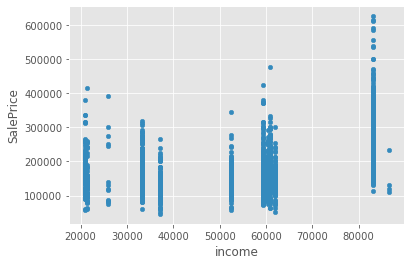

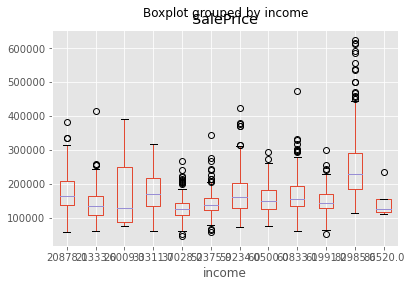

In [31]:
train.plot(kind = 'scatter', x = 'income', y= 'SalePrice')
train.boxplot(column ='SalePrice', by = 'income')


NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Edwards    112
Gilbert    112
Somerst    111
NWAmes      99
NridgHt     95
BrkSide     85
SawyerW     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
NPkVill     18
Blmngtn     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64


<AxesSubplot:title={'center':'SalePrice'}, xlabel='Neighborhood'>

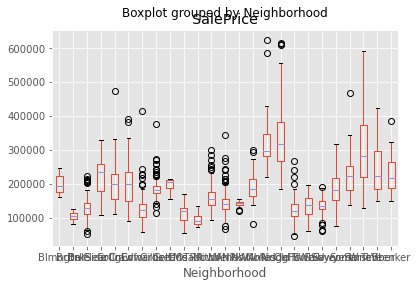

In [32]:
print(train.Neighborhood.value_counts())
train.boxplot(column ='SalePrice', by = 'Neighborhood')

# Dummies for Neigghborhood

In [34]:
dummy = pd.get_dummies(train['Neighborhood'], prefix='hood')
drop_col = train['Neighborhood'].mode()[0]
dummy.drop(['hood_'+drop_col], axis = 1, inplace= False) # race 1 is the dominant category
dummy.head()

train = pd.concat([train, dummy], axis= 1) 
train.shape

(1984, 67)

In [35]:
print(train.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',
       'hood_BrDale', 'hood_BrkSide', 'hood_ClearCr', 'hood_CollgCr',
       'hood_Crawfor', 'hood_Edwards', 'hood_Gilbert', 'hood_Greens',
       'hood_IDOTRR', 'hood_MeadowV', 'hood_Mitchel', 'hood_NAmes',
       'hood_NPkVill', 'hood_NWAmes', 'hood_NoRidge', 'hood_NridgHt',
       'hood_OldTown', 'hood_SWISU', 'hood_Sawyer', 'hood_SawyerW',
       'hood_Somerst', 'hood_StoneBr', 'hood_Timber', 'hood_Ve

<AxesSubplot:>

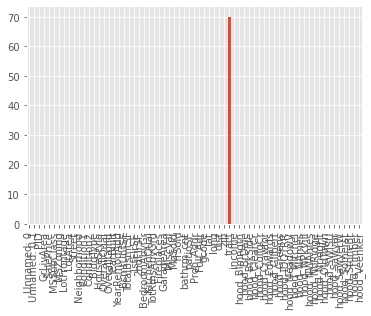

In [67]:
##Fill in Na with Median
# Lot Frontage

front = train.LotFrontage
med = front.median()

train['LotFrontage'].fillna(med,inplace= True)
hs_na = train.isna().sum()
hs_na.plot.bar()


# Income
front = train.income
med = front.median()

train['income'].fillna(med,inplace= True)


missingRows = pd.isnull(train.loc[:, train.columns != 'tract']).any(axis = 1)
#print('The columns with missingness are %s' %(train.columns[missingCols]))


#missingRows = pd.isnull(trai)
missingRows.sum()
train = train[~missingRows] 

hs_na = train.isna().sum()
hs_na.plot.bar()
